In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16

2025-02-04 14:31:01.586948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738666861.601125   70213 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738666861.605050   70213 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 14:31:01.620902: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# PATHS
train_path = r'train'
valid_path = r'validation'
test_path = r'test'

In [ ]:
# Create DataGenrator

img_gen = ImageDataGenerator(
    rescale=1./255,
)


train_data_gen = img_gen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    color_mode='rgb',
    shuffle=True,
)


valid_data_gen = img_gen.flow_from_directory(
    valid_path,
    target_size=(100, 100),
    color_mode='rgb',
    shuffle=True,
)

test_data_gen = img_gen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    color_mode='rgb',
    shuffle=True,
)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# Load VGG16 model
base_model = VGG16(include_top=False, input_shape=(100,100,3), weights='imagenet')

I0000 00:00:1738666863.778914   70213 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 748 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [ ]:
# Freeze layers model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add Fully Connected layers
input = base_model.output
x = keras.layers.Flatten()(input)
x = keras.layers.Dense(units=8, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
output = keras.layers.Dense(units=2, activation='softmax')(x)

# Create finall model
model = Model(inputs=base_model.input, outputs=output)

In [7]:
# model.summary()

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_check_point = ModelCheckpoint('model.weights.h5', save_best_only=True, save_weights_only=True)

In [ ]:
# Compile
model.compile(keras.optimizers.Adam(learning_rate=0.005), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
# Fit model
hist = model.fit(train_data_gen, batch_size=32, epochs=30, validation_data=valid_data_gen, verbose=1, callbacks=[early_stopping,model_check_point])

/home/mahdi/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1738666865.849640   70366 service.cc:148] XLA service 0x71ea6400f910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738666865.849660   70366 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-04 14:31:05.876475: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738666866.109240   70366 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-04 14:31:06.475626: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,100,100]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_c

 2/19 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5547 - loss: 0.7280

I0000 00:00:1738666870.994494   70366 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 7/19 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6932 - loss: 0.5591

2025-02-04 14:31:11.978809: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,100,100]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 14:31:12.045805: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,64,100,100]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.7755 - loss: 0.4520

2025-02-04 14:31:19.343224: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[18,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[18,3,100,100]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 14:31:19.414950: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[18,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[18,64,100,100]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 609ms/step - accuracy: 0.7792 - loss: 0.4471 - val_accuracy: 0.7386 - val_loss: 0.9529
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9425 - loss: 0.2268 - val_accuracy: 0.7516 - val_loss: 0.7098
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.9567 - loss: 0.1546 - val_accuracy: 0.8922 - val_loss: 0.2588
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9681 - loss: 0.1175 - val_accuracy: 0.8954 - val_loss: 0.2527
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9909 - loss: 0.0577 - val_accuracy: 0.9314 - val_loss: 0.1661
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.9872 - loss: 0.0507 - val_accuracy: 0.9150 - val_loss: 0.1918
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.9983 - loss: 0.0424 - val_accuracy: 0.9118 - val_loss: 0.2210
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9967 - loss: 0.0189 - val_accuracy: 0.9379 - val

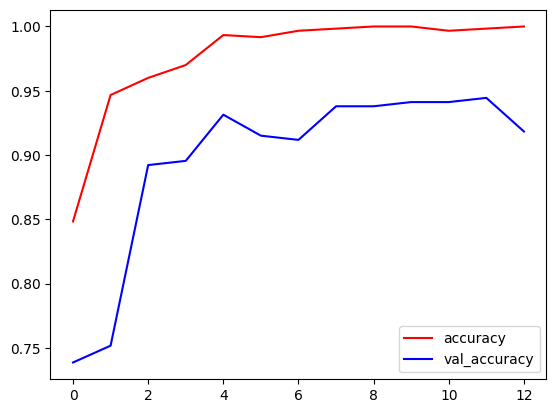

In [ ]:
# Show accuracy
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.legend(['accuracy', 'val_accuracy'])
plt.savefig('accuracy.png')
plt.show()

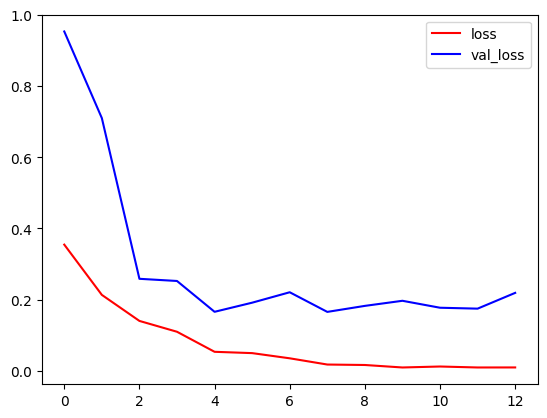

In [ ]:
# Show loss
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.legend(['loss', 'val_loss'])
plt.savefig('loss.png')
plt.show()

In [ ]:
# Save mode
model.save('model.h5')

In [ ]:
# Load weights model
model.load_weights('model.weights.h5')

In [ ]:
# Evaluate model on test dataset
model.evaluate(test_data_gen)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9097 - loss: 0.3063

2025-02-04 14:32:09.362386: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,100,100]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 14:32:09.433253: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,64,100,100]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,64,100,100]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 589ms/step - accuracy: 0.9138 - loss: 0.2983


[0.28630098700523376, 0.9200000166893005]